In [42]:
Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [28]:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat - Lifeboat (if survived)
# body - Body number (if did not survive and body was recovered)
titanic_Data = pd.read_csv(r'C:\Users\ravip\Documents\Data-Science\Machine Learning\Supervised Learning\Classification\Data\Titanic Dataset.csv')

In [29]:
titanic_Data['Fare_bin'] = pd.cut(titanic_Data['fare'], bins=5, labels=["0-100", "100-200", "200-300", "300-400", ">400"])
titanic_Data['Age_bin'] = pd.cut(titanic_Data['age'], bins=8, labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

In [30]:
model_data = titanic_Data[['pclass', 'sex', 'embarked', 'sibsp', 'parch','Age_bin', 'Fare_bin', 'survived']]
cat_cols = ['pclass', 'sex', 'embarked', 'sibsp', 'parch','Age_bin', 'Fare_bin']
for col in cat_cols:
    model_data = pd.concat([model_data, pd.get_dummies(model_data[col], drop_first=True, prefix=col)], axis=1)
    model_data.drop(columns=[col], inplace=True)
model_data

,survived,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,Age_bin_20-30,Age_bin_30-40,Age_bin_40-50,Age_bin_50-60,Age_bin_60-70,Age_bin_70-80,Fare_bin_100-200,Fare_bin_200-300,Fare_bin_300-400,Fare_bin_>400
0,1,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,False,False,True,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1305,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1306,0,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1307,0,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [31]:
# model_data = titanic_Data[['pclass', 'sex', 'embarked', 'sibsp', 'parch','Age_bin', 'Fare_bin', 'survived']]
X = model_data[['pclass_2', 'pclass_3', 'sex_male', 'embarked_Q',
       'embarked_S', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5',
       'sibsp_8', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'parch_9', 'Age_bin_10-20', 'Age_bin_20-30', 'Age_bin_30-40',
       'Age_bin_40-50', 'Age_bin_50-60', 'Age_bin_60-70', 'Age_bin_70-80',
       'Fare_bin_100-200', 'Fare_bin_200-300', 'Fare_bin_300-400',
       'Fare_bin_>400']]
y = model_data[['survived']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
DT_entrophy = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, random_state=100)
DT_entrophy.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [39]:
predictions = DT_entrophy.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7862595419847328
[[215  21]
 [ 63  94]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       236
           1       0.82      0.60      0.69       157

    accuracy                           0.79       393
   macro avg       0.80      0.75      0.76       393
weighted avg       0.79      0.79      0.78       393



[Text(0.5071747448979592, 0.9705882352941176, 'x[2] <= 0.5\ngini = 0.468\nsamples = 916\nvalue = [573, 343]'),
 Text(0.20052842565597667, 0.9117647058823529, 'x[1] <= 0.5\ngini = 0.407\nsamples = 320\nvalue = [91, 229]'),
 Text(0.0794460641399417, 0.8529411764705882, 'x[0] <= 0.5\ngini = 0.13\nsamples = 172\nvalue = [12, 160]'),
 Text(0.04081632653061224, 0.7941176470588235, 'x[12] <= 0.5\ngini = 0.06\nsamples = 97\nvalue = [3, 94]'),
 Text(0.029154518950437316, 0.7352941176470589, 'x[20] <= 0.5\ngini = 0.023\nsamples = 87\nvalue = [1, 86]'),
 Text(0.023323615160349854, 0.6764705882352942, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]'),
 Text(0.03498542274052478, 0.6764705882352942, 'x[5] <= 0.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.029154518950437316, 0.6176470588235294, 'x[25] <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.023323615160349854, 0.5588235294117647, 'x[26] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.01749271137026239, 0.5,

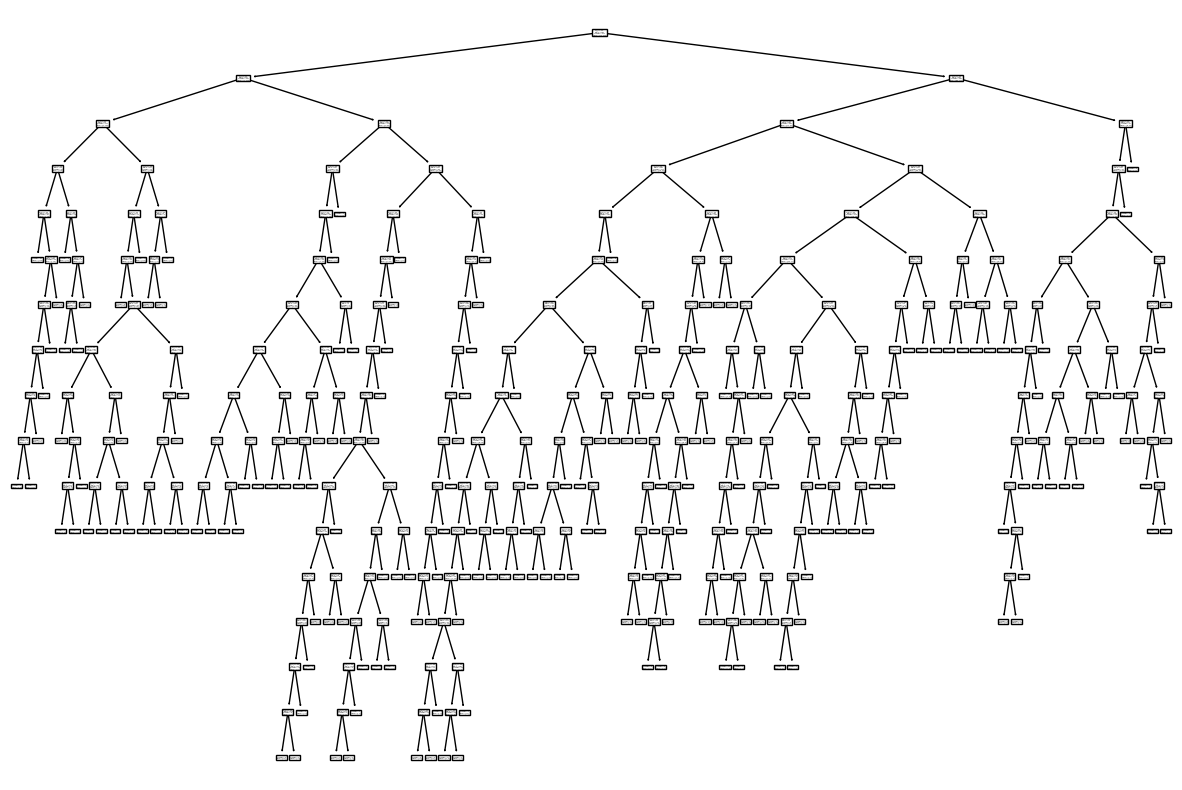

In [40]:
plt.figure(figsize=(15,10))
tree.plot_tree(DT_entrophy)

# pre-prunning

In [43]:
parameter={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_leaf':[3,4,5,6,7,8,9,10]
}
tree_model = DecisionTreeClassifier(random_state=100)
cv = GridSearchCV(tree_model, param_grid=parameter, cv=5, scoring='accuracy')

In [44]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [45]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'splitter': 'best'}

In [46]:
DT_entrophy = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=3, random_state=100)
DT_entrophy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=100)

In [47]:
predictions = DT_entrophy.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7913486005089059
[[222  14]
 [ 68  89]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       236
           1       0.86      0.57      0.68       157

    accuracy                           0.79       393
   macro avg       0.81      0.75      0.76       393
weighted avg       0.80      0.79      0.78       393

